# **Data Analysis for FAANG Securities**
---

### Import Libraries

In [2]:
import os
import warnings
import operator 

import datetime as dt

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm 

from importlib import reload

warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 180

### Retrieve Data

In [3]:
ticker = 'FB'
#ticker = 'AAPL'
#ticker = 'AMZN'
#ticker = 'NFLX'
#ticker = 'GOOG'

In [4]:
files = os.listdir('data/stocks')
stocks = {}
for file in files:
    if file.split('.')[1] == 'csv':
        name = file.split('.')[0]
        stocks[name] = pd.read_csv('data/stocks/'+file, index_col='Date')
        stocks[name].index = pd.to_datetime(stocks[name].index)
print('List of stocks: ', end = ' ')
for i in stocks.keys():
    print(i.upper(), end=' ')

List of stocks:  AMZN FB NFLX GOOG AAPL 

In [5]:
stocks[ticker.lower()].tail()

,High,Low,Open,Close,Volume,Adj Close,Return,Change,Volatility,MA7,MA21,Momentum,RSI,MACD,Signal,Upper_Band,Lower_Band
Date,,,,,,,,,,,,,,,,,
2022-04-01,227.279999,222.699997,224.550003,224.850006,19533300,224.850006,0.001,2.490005,42.202087,224.271432,208.440954,226.860001,54.617810,0.805737,-3.418365,237.812118,179.069790
2022-04-04,234.350006,225.860001,225.979996,233.889999,28054800,233.889999,0.035,9.039993,41.245671,226.317145,210.051907,224.850006,60.062217,1.924640,-2.349764,241.152522,178.951292
2022-04-05,236.860001,231.020004,234.080002,231.839996,29727200,231.839996,-0.010,-2.050003,40.301674,227.748572,212.164764,219.360001,58.352609,2.615808,-1.356650,242.847894,181.481634
2022-04-06,228.990005,221.410004,226.910004,223.300003,28995100,223.300003,-0.016,-8.539993,39.394519,227.707145,213.736669,221.850006,51.744907,2.446258,-0.596068,243.065398,184.407940
2022-04-07,225.520004,218.559998,223.929993,224.619995,15582673,224.619995,0.003,1.319992,38.499371,226.958572,214.980478,230.889999,52.637641,2.390841,0.001314,243.806418,186.154538


---
# Check for Correlation
---

In [21]:
stocks[ticker.lower()].corr()[['Return']].sort_values(by='Return', ascending=False)[:5]

,Return
Return,1.000000
Change,0.560432
RSI,0.253506
Close,0.040763
Adj Close,0.040763


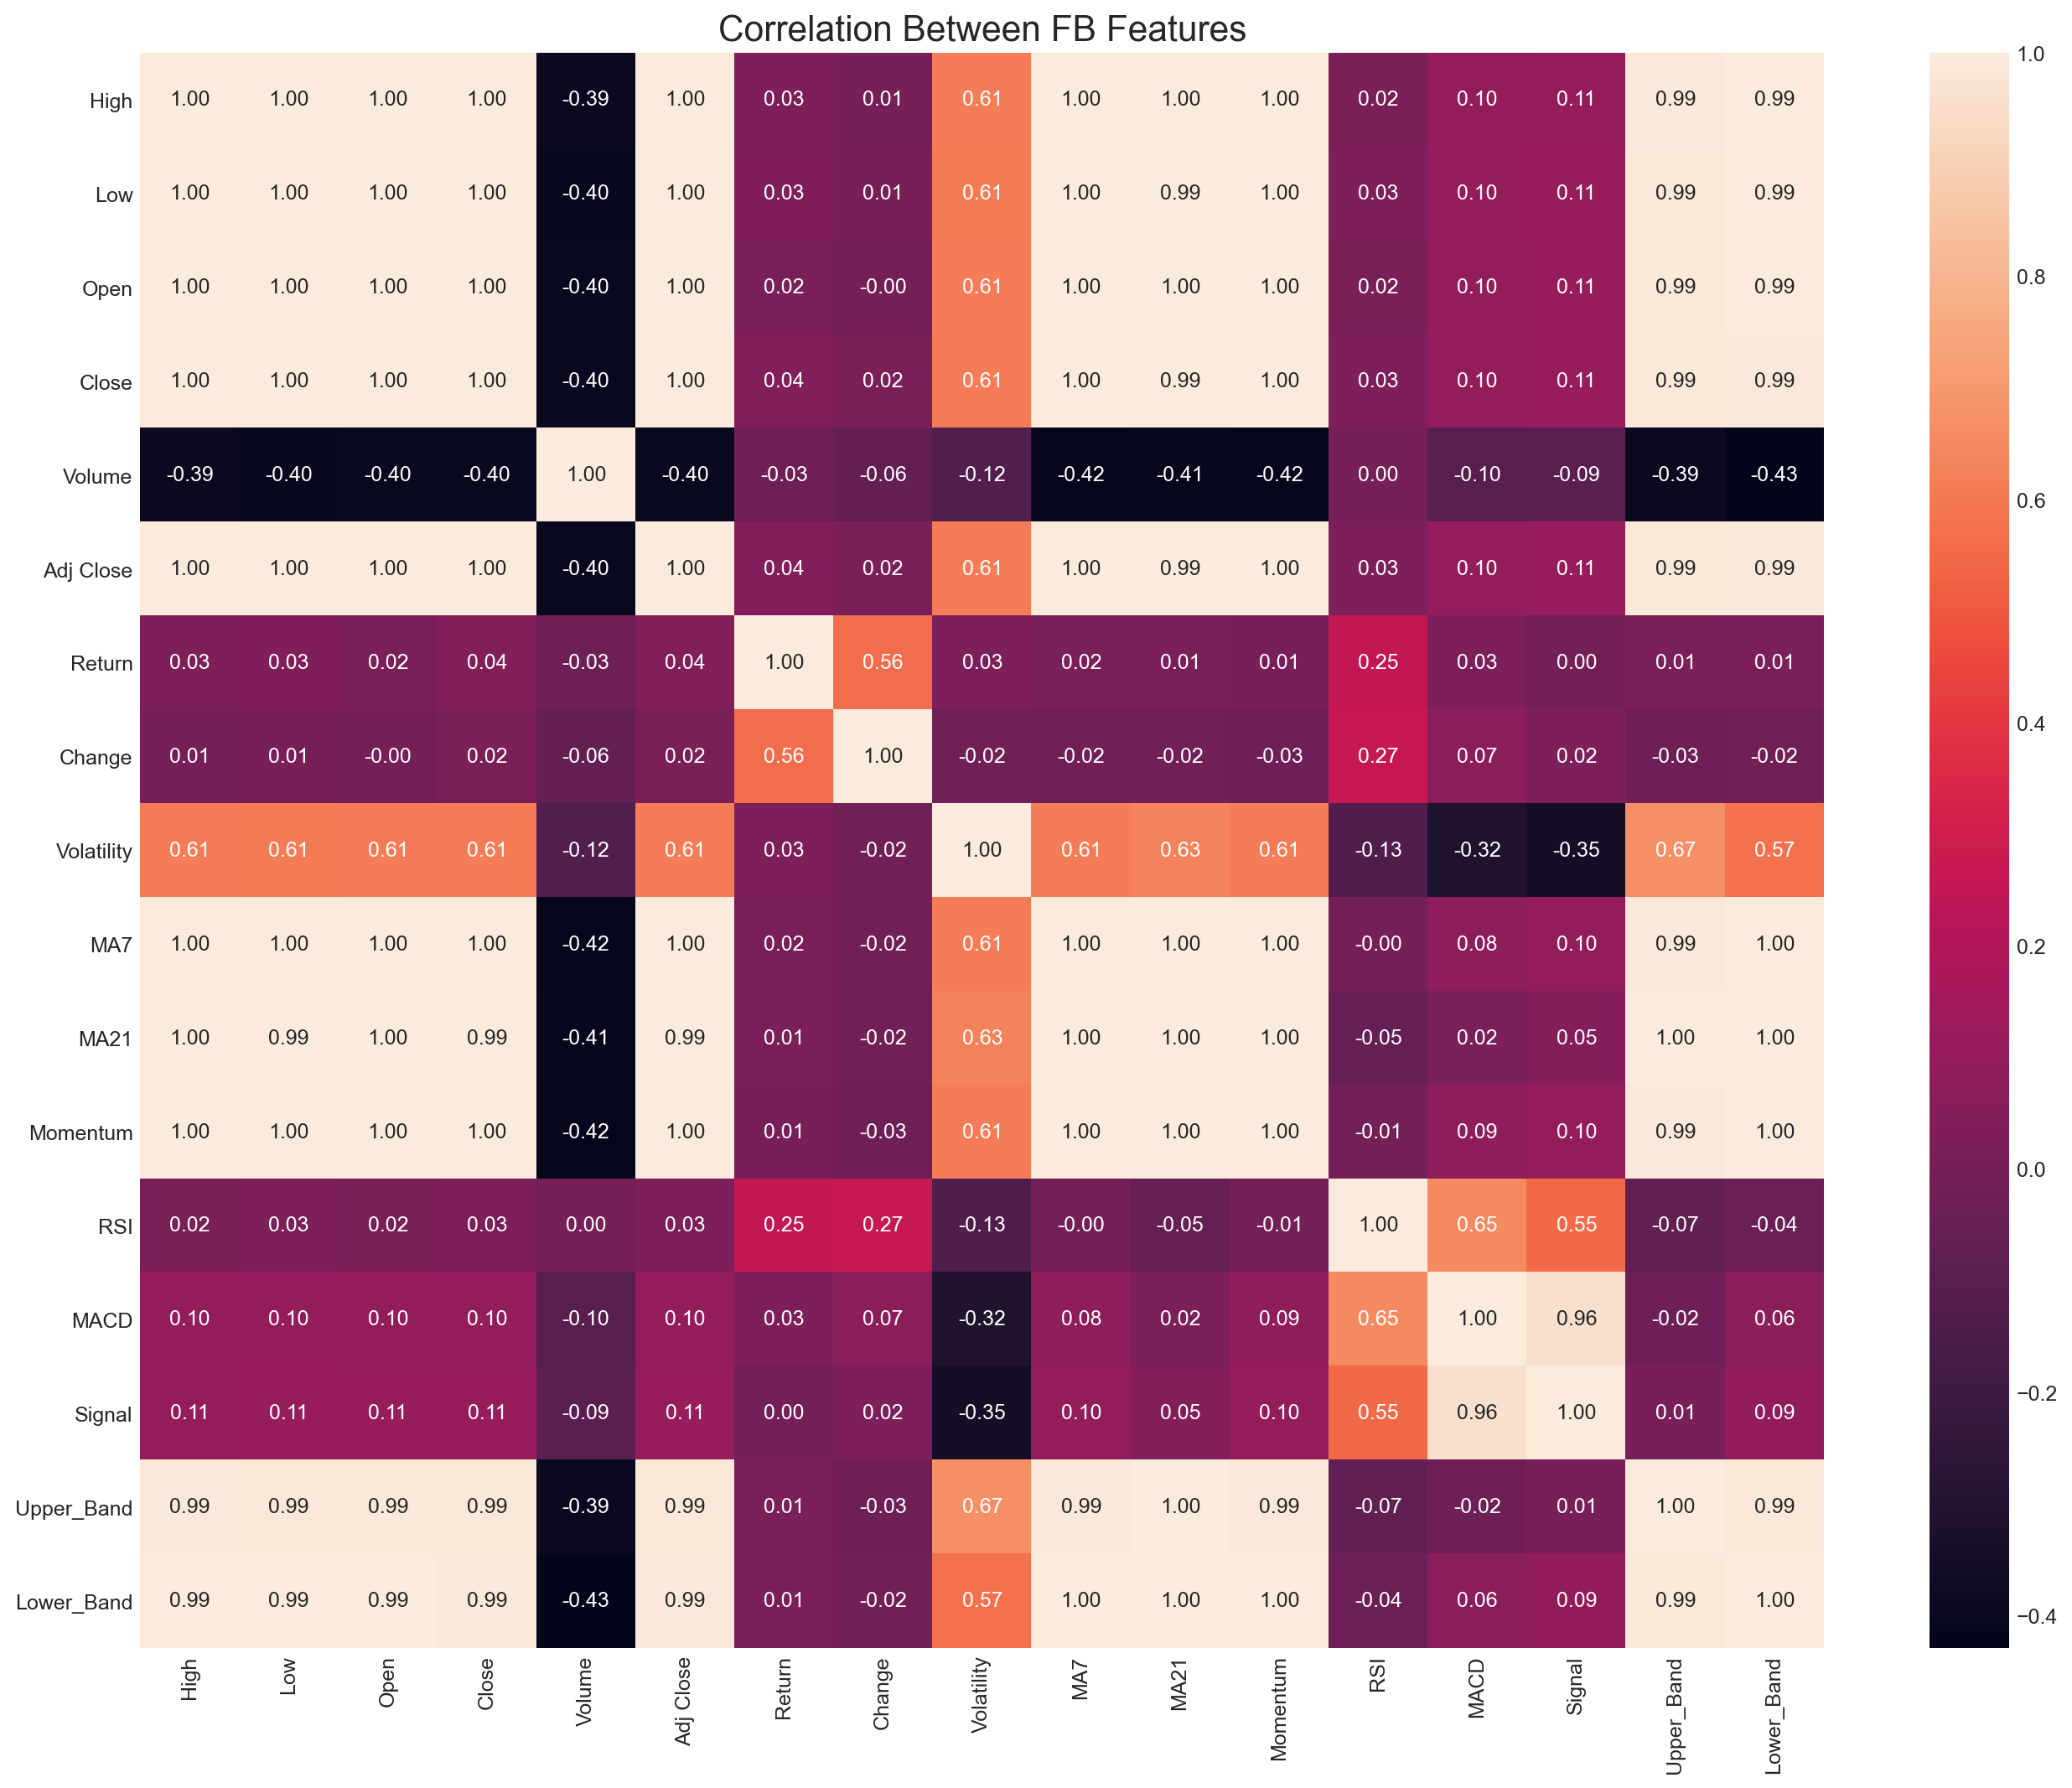

In [23]:
plt.figure(figsize=(18,14))
sns.heatmap(stocks[ticker.lower()].corr(), annot=True, fmt='.2f')
plt.ylim(17,0)
plt.title('Correlation Between '+ticker.upper()+' Features', fontSize=17)
plt.show();

---
# Bollinger Bands
---

In [28]:
Blue = '#3388cf'
Purple = '#ad6eff'
Red = '#ff6e9d'
Green = '#60e8ad'
Dark_Green = '#ffa74a'
Dark_Orange = '#ffbd74'
Light_Orange = '#ffa33f'
Fill_Orange = '#ffa33f'

In [29]:
std = 2
xend = dt.date(2020,12,31)
xstart = dt.date(2020,1,1)

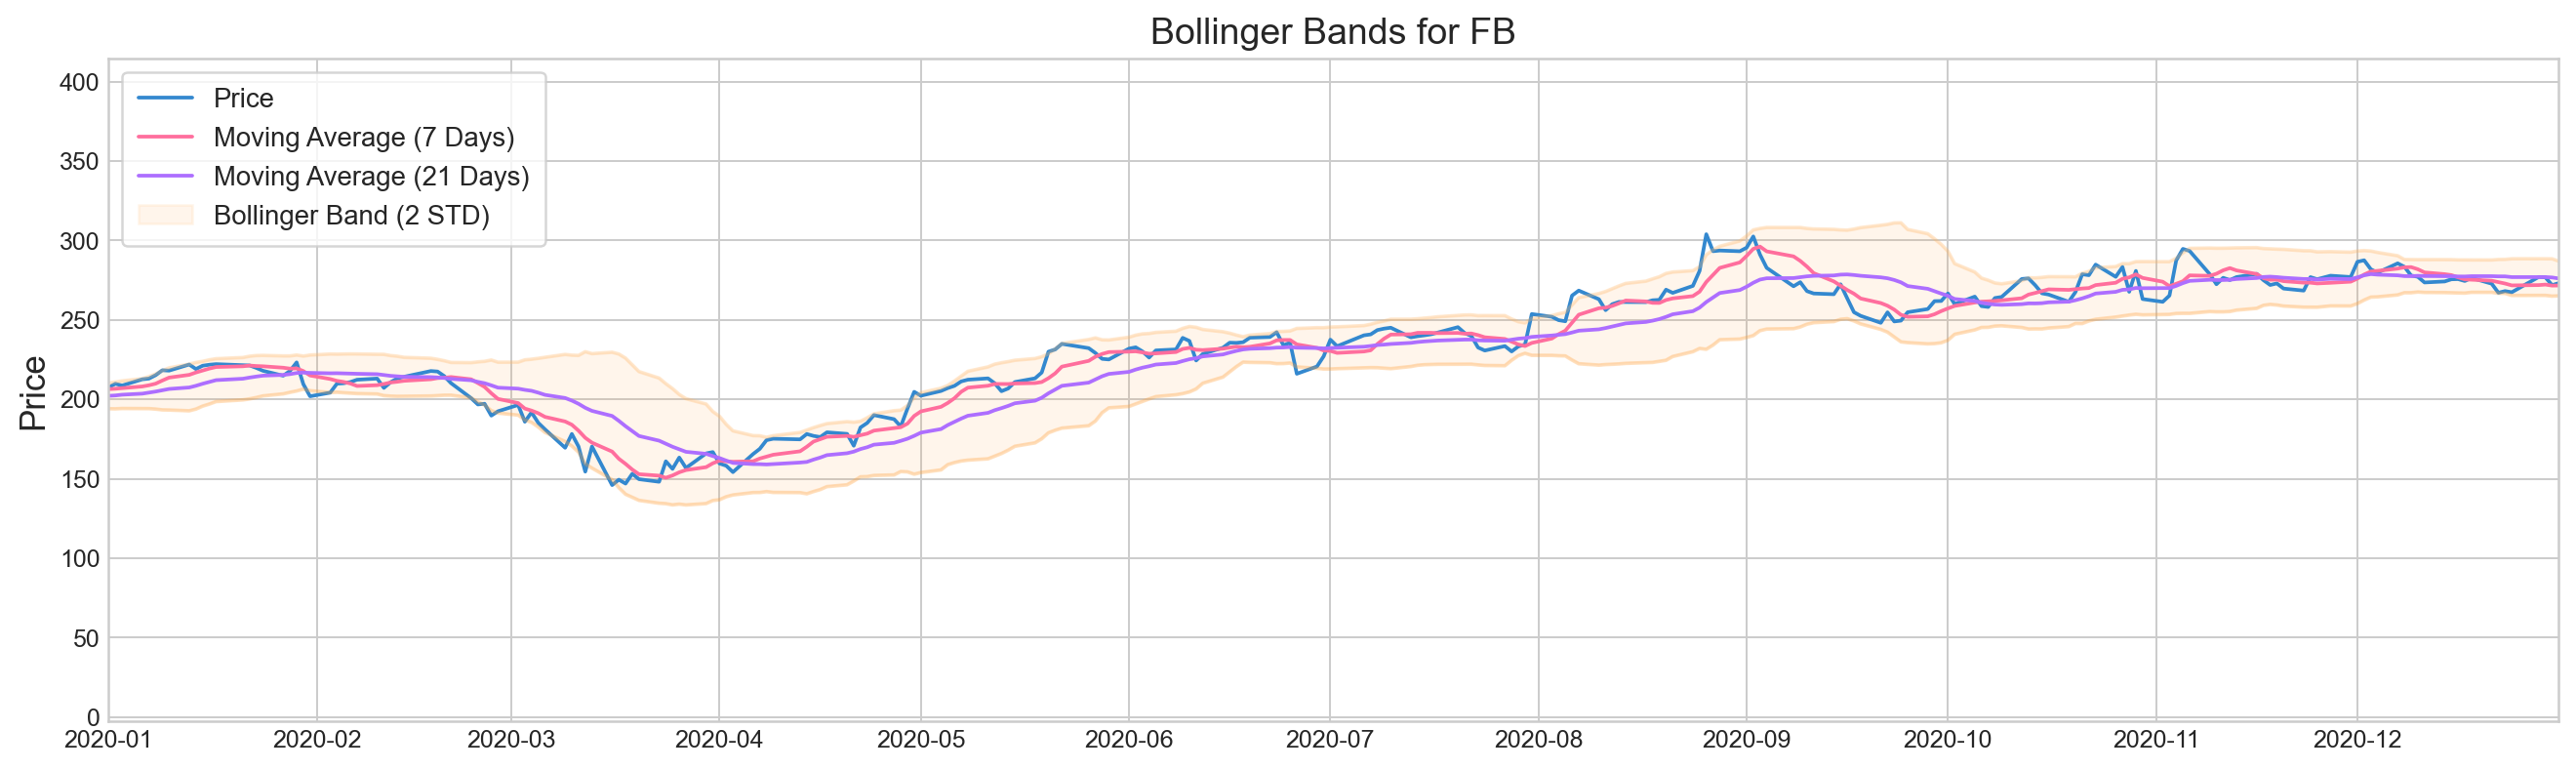

In [37]:
plt.figure(figsize=(18,5))
plt.style.use('seaborn-whitegrid')

plt.plot(stocks[ticker.lower()].index, stocks[ticker.lower()].Close, color=Blue, label = 'Price')
plt.plot(stocks[ticker.lower()].index, stocks[ticker.lower()].MA7, color=Red, label = 'Moving Average (7 Days)')
plt.plot(stocks[ticker.lower()].index, stocks[ticker.lower()].MA21, color=Purple, label = 'Moving Average (21 Days)')

plt.plot(stocks[ticker.lower()].index, stocks[ticker.lower()].Upper_Band, color=Dark_Orange, alpha=0.3)
plt.plot(stocks[ticker.lower()].index, stocks[ticker.lower()].Lower_Band, color=Light_Orange, alpha=0.3)
plt.fill_between(stocks[ticker.lower()].index, stocks[ticker.lower()].Upper_Band, stocks[ticker.lower()].Lower_Band, color=Light_Orange, alpha=0.1, label='Bollinger Band ({} STD)'.format(std))

plt.legend(frameon=True,loc=2, ncol=1, fontsize=11, borderpad=.6)
plt.title('Bollinger Bands for '+ticker.upper(), fontsize=15)
plt.ylabel('Price', fontsize=14)
plt.xlim([xstart,xend])
plt.show();

---
# Relative Strength Index (RSI)
---

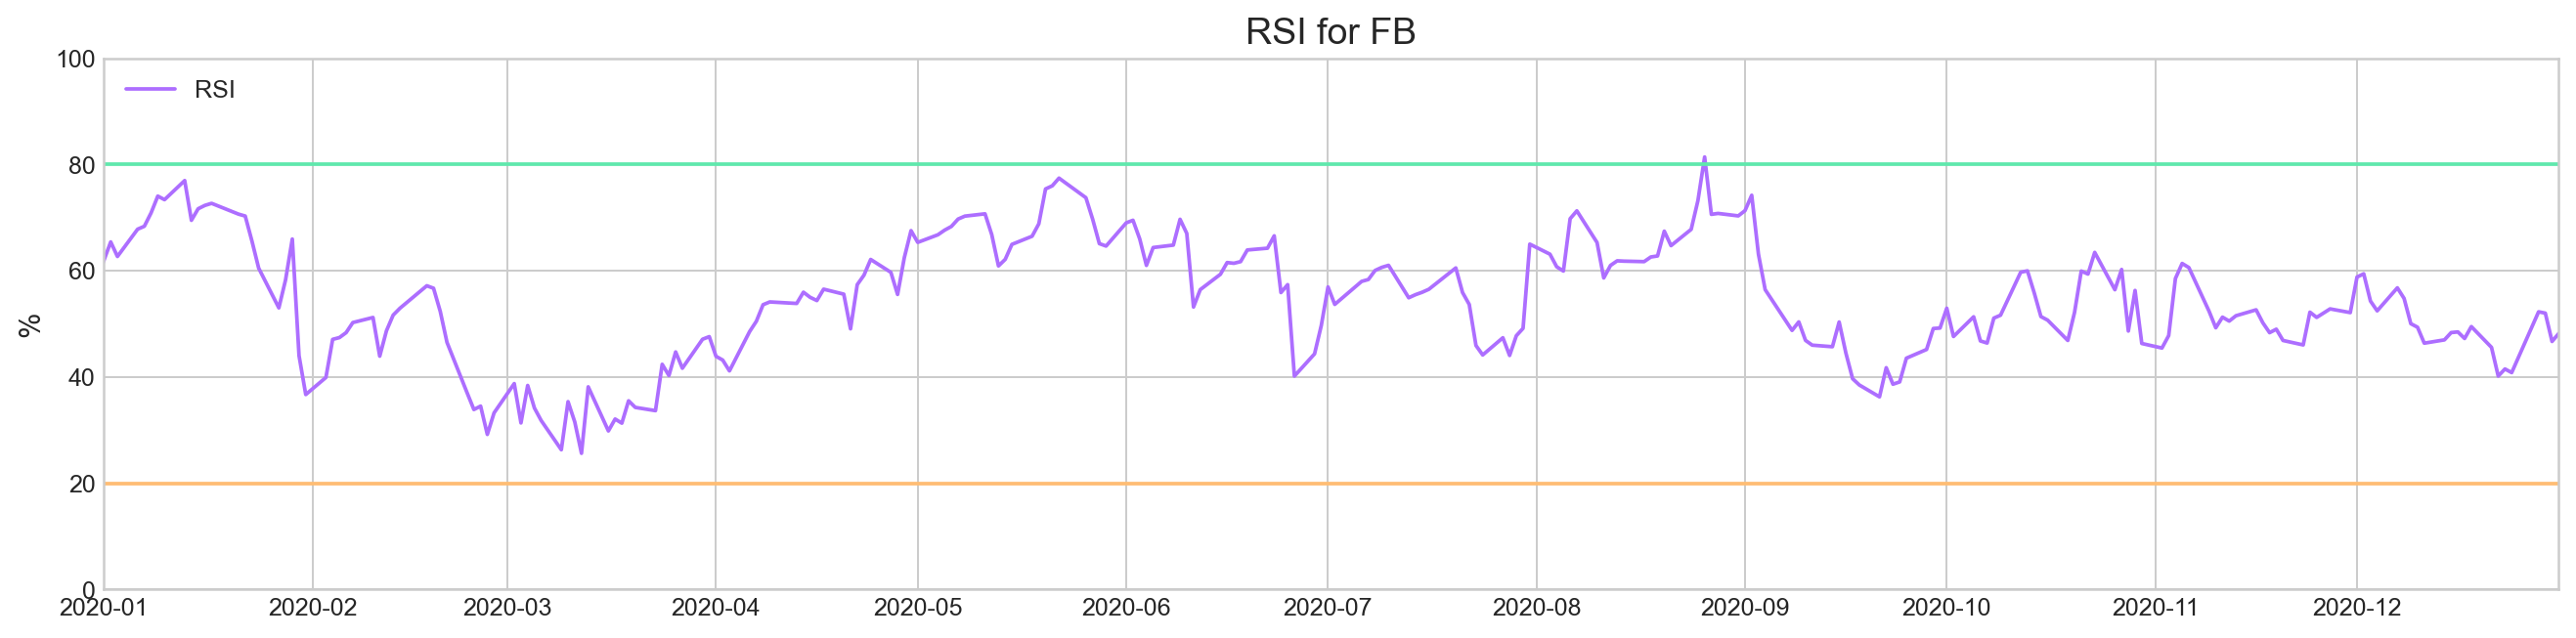

In [32]:
plt.figure(figsize=(18,4))

plt.plot(stocks[ticker.lower()].index, stocks[ticker.lower()].RSI, color=Purple, label='RSI')

plt.xlim([xstart,xend])
plt.ylim([0,100])
plt.axhline(20, color=Dark_Orange)
plt.axhline(80, color=Green)

plt.legend(loc=2)
plt.title('RSI for '+ticker.upper(),fontsize=15)
plt.ylabel('%', fontsize=12)
plt.show();

---
# Moving Average Convergence/Divergence (MACD)
---

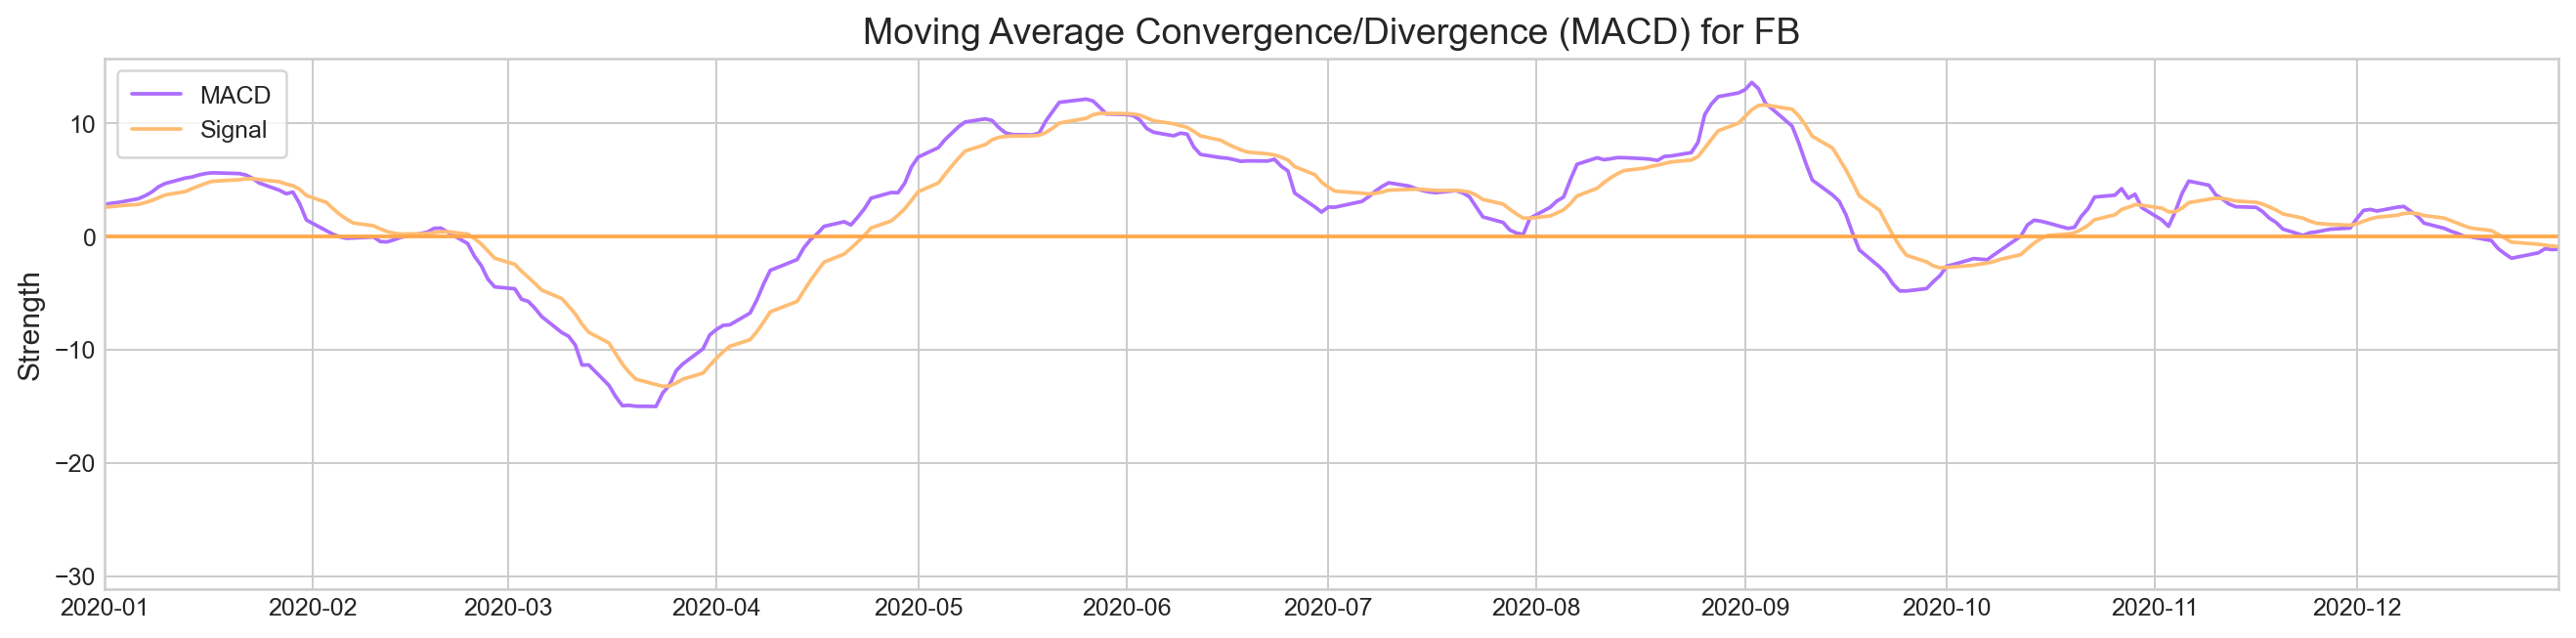

In [33]:
plt.figure(figsize=(18,4))

plt.plot(stocks[ticker.lower()].MACD, label="MACD", color=Purple)
plt.plot(stocks[ticker.lower()].Signal, label="Signal", color=Dark_Orange)

plt.axhline(0, color=Dark_Green)
plt.xlim([xstart,xend])

plt.legend(frameon=True, loc=2, ncol=1, fontsize=10, borderpad=.6)
plt.ylabel('Strength', fontsize=12)
plt.title("Moving Average Convergence/Divergence (MACD) for "+ticker.upper(), fontsize=15)
plt.show();

---
# Volume
---

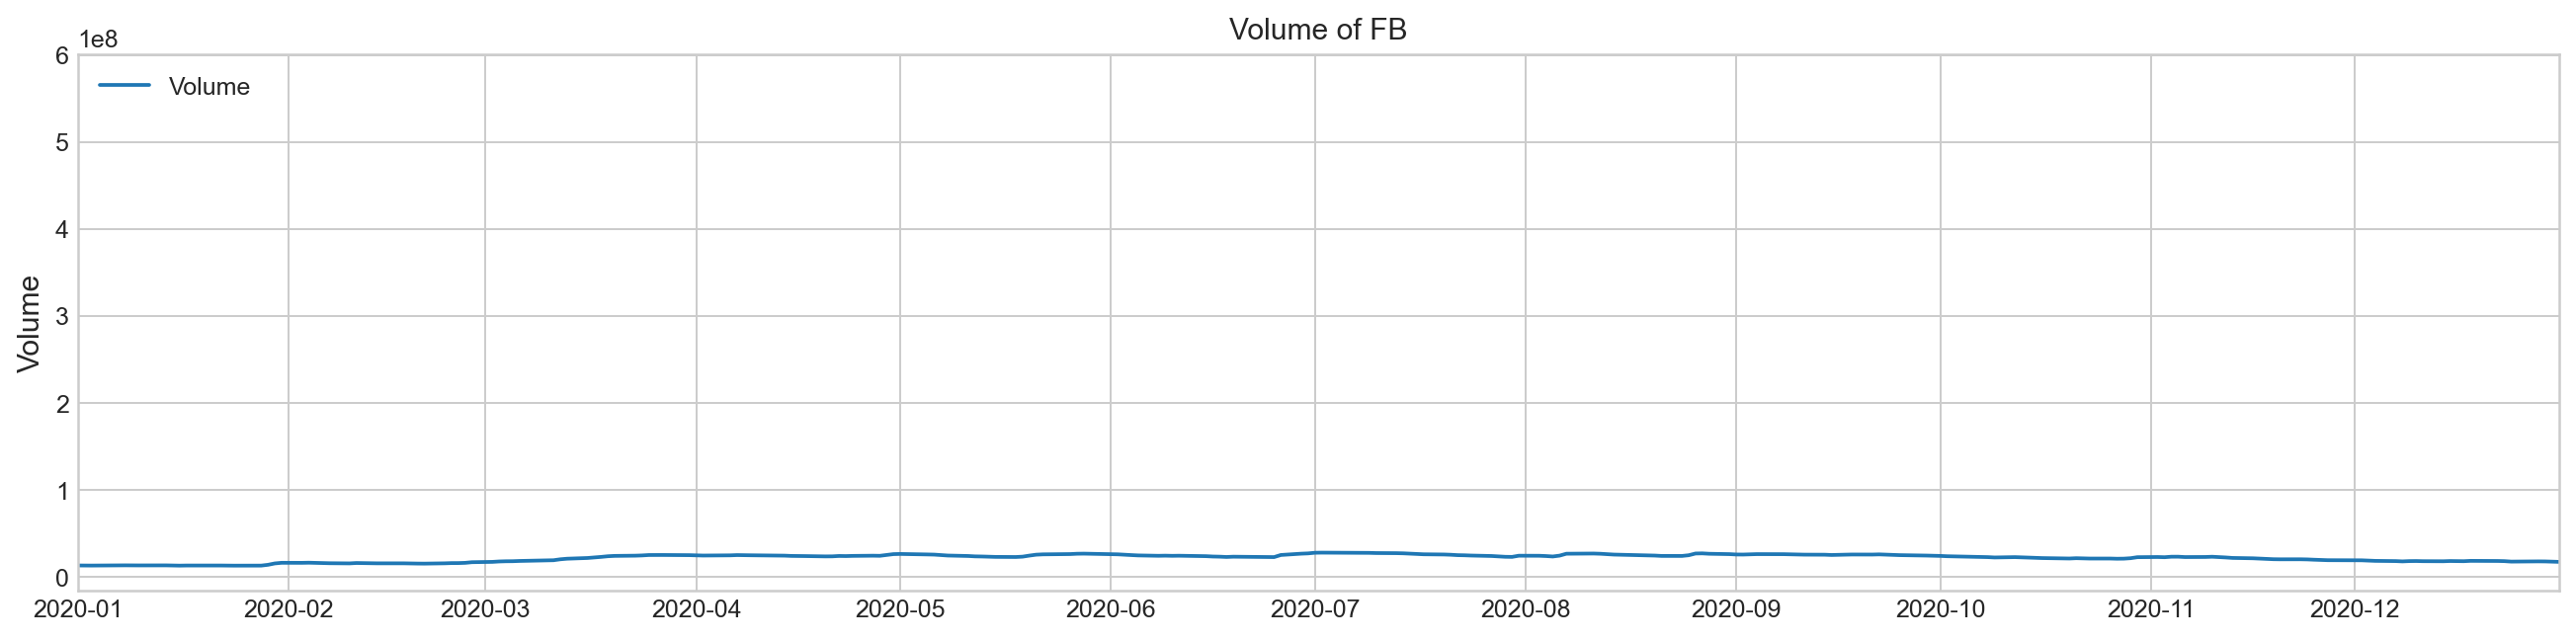

In [36]:
plt.figure(figsize=(18,4))
plt.style.use('seaborn-whitegrid')

plt.plot(stocks[ticker.lower()].index, stocks[ticker.lower()]['Volume'].ewm(21).mean(), label="Volume")

plt.xlim([xstart,xend])

plt.legend(loc=2)
plt.ylabel('Volume', fontsize=12)
plt.title("Volume of "+ticker.upper())
plt.show();